In [1]:
import pandas as pd
import os
from glob import glob

# Définir le répertoire contenant vos fichiers parquet
data_dir = "crypto_data/pair_data/"

# Lister tous les fichiers .parquet
all_files = glob(os.path.join(data_dir, "*.parquet"))
for i in all_files:
    print(i)

crypto_data/pair_data/ethusdc_4h.parquet
crypto_data/pair_data/ethusdc_1m.parquet
crypto_data/pair_data/ethusdc_1d.parquet
crypto_data/pair_data/btcusdc_1h.parquet
crypto_data/pair_data/btcusdc_1m.parquet
crypto_data/pair_data/btcusdc_1d.parquet
crypto_data/pair_data/btcusdc_4h.parquet
crypto_data/pair_data/ethusdc_1h.parquet


In [2]:
# Charger le fichier BTCUSDC en timeframe 1d
btc_file = "crypto_data/pair_data/btcusdc_1d.parquet"
df = pd.read_parquet(btc_file)

# Vérifier le chargement
print(df.shape)
df.tail()

(2195, 14)


,open_time,open,high,low,close,volume,close_time,quote_asset_volume,nb_trades,taker_buy_base,taker_buy_quote,ignore,open_dt,close_dt
2190,1748131200000,107800.01,109375.67,106610.00,109058.00,2610.10978,1748217599999,281167097.54639220,418715,1294.37363000,139500243.99711760,0,2025-05-25 00:00:00+00:00,2025-05-25 23:59:59.999000+00:00
2191,1748217600000,109058.00,110480.74,108736.84,109478.01,3722.40078,1748303999999,407794964.65870200,523497,1679.47246000,184147167.91161310,0,2025-05-26 00:00:00+00:00,2025-05-26 23:59:59.999000+00:00
2192,1748304000000,109478.01,110799.10,107547.13,108992.92,4879.95661,1748390399999,534502366.33216820,938591,2301.80236000,252208426.78174640,0,2025-05-27 00:00:00+00:00,2025-05-27 23:59:59.999000+00:00
2193,1748390400000,108992.92,109334.92,106814.85,107817.98,3549.21863,1748476799999,383864583.58088320,825601,1602.79008000,173367211.77907440,0,2025-05-28 00:00:00+00:00,2025-05-28 23:59:59.999000+00:00
2194,1748476800000,107817.98,108676.76,106993.95,108628.18,1109.68116,1748563199999,119799152.75610070,317267,565.85991000,61099663.05674390,0,2025-05-29 00:00:00+00:00,2025-05-29 23:59:59.999000+00:00


In [3]:
# Colonnes à garder
# cols_to_keep = ['open_dt', 'open', 'high', 'low', 'close', 'volume']
cols_to_keep = ['open', 'high', 'low', 'close', 'volume']

# Sélectionner uniquement ces colonnes
df = df[cols_to_keep]

# # Renommer la colonne de date
# df = df.rename(columns={'open_dt': 'timestamp'})

# # Convertir en datetime et mettre en index
# df['timestamp'] = pd.to_datetime(df['timestamp'])
# df = df.set_index('timestamp').sort_index()

# Vérifier le résultat
print(df.columns.tolist())
df.head()

['open', 'high', 'low', 'close', 'volume']


,open,high,low,close,volume
0,3200.00,3312.32,3000.00,3183.47,283.213859
1,3183.47,3257.31,3178.54,3199.27,423.048529
2,3192.69,3587.35,3187.25,3494.65,1163.940291
3,3507.62,3683.35,3428.34,3670.11,1251.139627
4,3673.18,3920.00,3618.53,3676.32,2655.242827


In [4]:
# Calculer les EMA à 12 et 26 périodes sur la colonne 'close'
df_indicateurs = df.copy()
df_indicateurs['EMA12'] = df_indicateurs['close'].ewm(span=12, adjust=False).mean()
df_indicateurs['EMA26'] = df_indicateurs['close'].ewm(span=26, adjust=False).mean()
df_indicateurs.head()

,open,high,low,close,volume,EMA12,EMA26
0,3200.00,3312.32,3000.00,3183.47,283.213859,3183.470000,3183.470000
1,3183.47,3257.31,3178.54,3199.27,423.048529,3185.900769,3184.640370
2,3192.69,3587.35,3187.25,3494.65,1163.940291,3233.400651,3207.604047
3,3507.62,3683.35,3428.34,3670.11,1251.139627,3300.586705,3241.863747
4,3673.18,3920.00,3618.53,3676.32,2655.242827,3358.391827,3274.045692


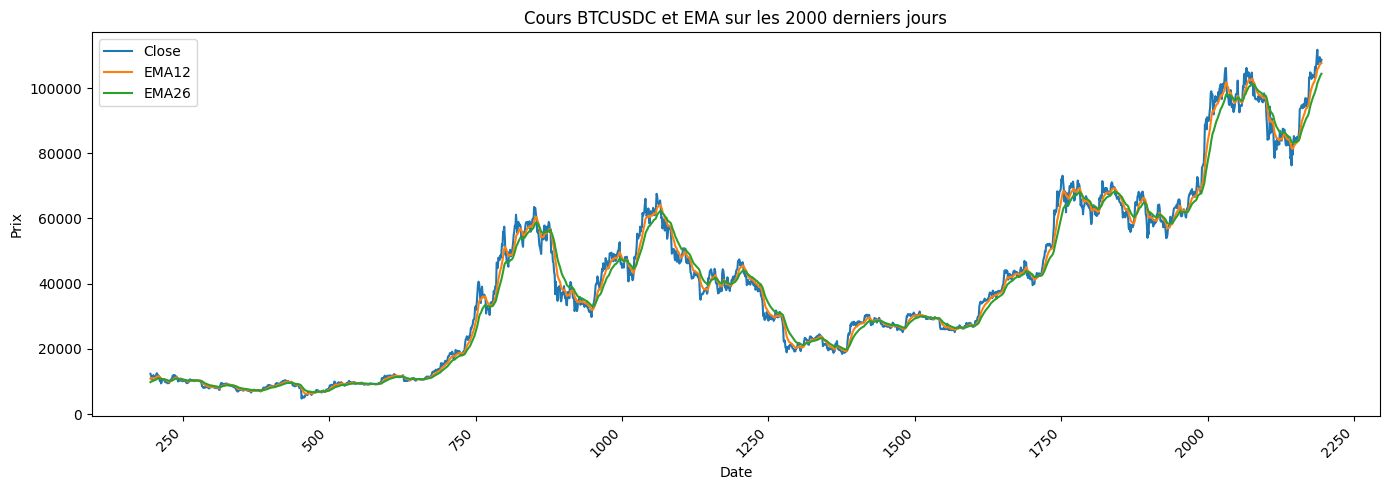

In [5]:
import matplotlib.pyplot as plt

# Nombre de jours à afficher
X = 2000  
df_last = df_indicateurs.tail(X)

# 1. Créer un subplot avec taille personnalisée
fig, ax = plt.subplots(figsize=(14, 5))  # largeur=14, hauteur=7 pouces

# 2. Tracer les courbes
ax.plot(df_last.index, df_last['close'], label='Close')
ax.plot(df_last.index, df_last['EMA12'], label='EMA12')
ax.plot(df_last.index, df_last['EMA26'], label='EMA26')

# 3. Pivoter les labels de dates de 45°
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

# 4. Étiquettes et légende
ax.set_xlabel('Date')
ax.set_ylabel('Prix')
ax.set_title(f'Cours BTCUSDC et EMA sur les {X} derniers jours')
ax.legend()

# 5. Mise en page et affichage
plt.tight_layout()
plt.show()


In [6]:
_DESCRIPTIONS = {
    # Dates & durée
    "Start":                 "Première date du backtest",
    "End":                   "Dernière date du backtest",
    "Duration":              "Période totale analysée",

    # Exposition & capital
    "Exposure Time [%]":     "Temps passé en position",
    "Equity Final [$]":      "Capital final",
    "Equity Peak [$]":       "Plus haut capital atteint",
    "Commissions [$]":       "Frais totaux payés",

    # Performances
    "Return [%]":            "Rendement net",
    "Buy & Hold Return [%]": "Performance buy-&-hold",
    "Return (Ann.) [%]":     "Rendement annualisé",
    "Volatility (Ann.) [%]": "Volatilité annualisée",
    "CAGR [%]":              "Taux de croissance annualisé",
    "Sharpe Ratio":          "Ratio rendement/volatilité",
    "Sortino Ratio":         "Sharpe corrigé des baisses",
    "Calmar Ratio":          "Ratio rendement / DD max",
    "Alpha [%]":             "Surperformance vs marché",
    "Beta":                  "Sensibilité au marché",

    # Drawdowns
    "Max. Drawdown [%]":     "Pire retrait maximal",
    "Avg. Drawdown [%]":     "Retrait moyen",
    "Max. Drawdown Duration":"Durée du pire retrait",
    "Avg. Drawdown Duration":"Durée moyenne des retraits",

    # Trades
    "# Trades":              "Nombre total de trades",
    "Win Rate [%]":          "Trades gagnants (%)",
    "Best Trade [%]":        "Trade le plus gagnant",
    "Worst Trade [%]":       "Trade le plus perdant",
    "Avg. Trade [%]":        "Gain/perte moyen",
    "Max. Trade Duration":   "Durée max d'un trade",
    "Avg. Trade Duration":   "Durée moyenne des trades",
    "Profit Factor":         "Somme gains / pertes",
    "Expectancy [%]":        "Gain espéré par trade",
    "SQN":                   "Quality Number de Van Tharp",
    "Kelly Criterion":       "Fraction idéale à miser",
}

In [8]:
# ema12_26_backtest.py
# ──────────────────────────────────────────────────────────────────────────────
import os
import pathlib
import warnings

import matplotlib.pyplot as plt
import pandas as pd
from backtesting import Backtest, Strategy
from backtesting.lib import crossover
from tabulate import tabulate    # pip install tabulate (facultatif)

# ─── Filtrage / résolution des avertissements ────────────────────────────────
warnings.filterwarnings(
    "ignore",
    message=r"no explicit representation of timezones available for np\.datetime64",
)

# ─── Paramètres utilisateur ───────────────────────────────────────────────────
X = 2000                         # Nombre de barres à backtester
INITIAL_CAPITAL = 3_000         # Capital de départ (USDC)
COMMISSION = 0.01               # 0,05 % de frais (réduit) → 0.01 = 1 %
DATA_FILE = "crypto_data/pair_data/btcusdc_1d.parquet"
OUTPUT_DIR = pathlib.Path("crypto_data/strategy/008")
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)
STATS_FILE = OUTPUT_DIR / "ema_strategy_stats.csv"

# ─── Chargement et préparation des données ───────────────────────────────────
df = pd.read_parquet(DATA_FILE)
df = df.rename(
    columns=dict(
        open_dt="Date",
        open="Open",
        high="High",
        low="Low",
        close="Close",
        volume="Volume",
    )
)

# Passe en timezone-aware puis retire le fuseau → évite l’avertissement Bokeh
df["Date"] = pd.to_datetime(df["Date"], utc=True).dt.tz_localize(None)
df = df.set_index("Date").sort_index()

df_bt = df[["Open", "High", "Low", "Close", "Volume"]].copy()

# ─── Conversion BTC → satoshis pour éviter le fractional trading ─────────────
SATOSHIS_PER_BTC = 100_000_000
for col in ["Open", "High", "Low", "Close"]:
    df_bt[col] /= SATOSHIS_PER_BTC

# Calcul des moyennes mobiles exponentielles
df_bt["EMA12"] = df_bt["Close"].ewm(span=12, adjust=False).mean()
df_bt["EMA26"] = df_bt["Close"].ewm(span=26, adjust=False).mean()

# Ne conserver que les X dernières barres
df_bt = df_bt.tail(X)

print("Exemple conversion BTC/SAT")
print(f"1 Satoshi : {df_bt['Close'].iloc[-1]:.8f} USDC")
print(f"1 BTC     : {df_bt['Close'].iloc[-1] * SATOSHIS_PER_BTC:.2f} USDC")

# ─── Définition de la stratégie EMA Crossover ────────────────────────────────
class EMACrossoverStrategy(Strategy):
    position_size = 0.5      # 50 % de l’equity par trade
    risk_percent = 0.01      # 1 % d’equity risqué
    tp_sl_ratio = 3.5        # TP:SL = 3.5 : 1

    def init(self):
        self.ema_short = self.I(lambda x: x, self.data.EMA12, name="EMA12")
        self.ema_long = self.I(lambda x: x, self.data.EMA26, name="EMA26")

    def next(self):
        if self.position:
            return

        if crossover(self.ema_short, self.ema_long):
            price = self.data.Close[-1]
            position_value = self.equity * self.position_size
            qty = position_value / price

            risk_amount = self.equity * self.risk_percent
            sl_per_sat = risk_amount / qty
            stop_price = price - sl_per_sat
            take_price = price + sl_per_sat * self.tp_sl_ratio

            if stop_price > 0 and take_price > price:
                self.buy(size=self.position_size, sl=stop_price, tp=take_price)

# ─── Exécution du backtest ───────────────────────────────────────────────────
bt = Backtest(
    df_bt,
    EMACrossoverStrategy,
    cash=INITIAL_CAPITAL,
    commission=COMMISSION,
    trade_on_close=True,
    exclusive_orders=True,
)

stats = bt.run()

# ─── Mise en forme & export des statistiques ────────────────────────────────
def _beautify(val):
    """Pourcentages jolis pour |val| < 1, sinon 2 décimales."""
    if isinstance(val, (float, int)):
        if abs(val) < 1 and val != 0:
            return f"{val:.2%}"
        return f"{val:.2f}"
    return val

stats_df = stats.to_frame(name="Value")
stats_df.index.name = "Metric"

# ⚠️  remplacement de applymap → map  (plus de FutureWarning)
stats_formatted = stats_df.head(32).map(_beautify)

stats_df["Description"] = stats_df.index.map(lambda k: _DESCRIPTIONS.get(k, "—"))

mapper = "map" if hasattr(stats_df, "map") else "applymap"
stats_formatted = getattr(stats_df.head(32), mapper)(_beautify)

print("\n===== Statistiques EMA 12/26 =====")
print(tabulate(
    stats_formatted.reset_index(),   # tabulate n'aime pas les index hiérarchiques
    headers=["Metric", "Value", "Description"],
    tablefmt="github",
))
# stats_formatted.to_csv(STATS_FILE, encoding="utf-8")
# print(f"\nStats enregistrées dans : {STATS_FILE}")

# ─── Plot du backtest ────────────────────────────────────────────────────────
bt.plot()
plt.show()


Exemple conversion BTC/SAT
1 Satoshi : 0.00108628 USDC
1 BTC     : 108628.18 USDC



===== Statistiques EMA 12/26 =====
|    | Metric                 | Value               | Description                  |
|----|------------------------|---------------------|------------------------------|
|  0 | Start                  | 2019-06-28 00:00:00 | Première date du backtest    |
|  1 | End                    | 2025-05-29 00:00:00 | Dernière date du backtest    |
|  2 | Duration               | 2162 days 00:00:00  | Période totale analysée      |
|  3 | Exposure Time [%]      | 7.35                | Temps passé en position      |
|  4 | Equity Final [$]       | 2843.86             | Capital final                |
|  5 | Equity Peak [$]        | 3000.00             | Plus haut capital atteint    |
|  6 | Commissions [$]        | 736.18              | Frais totaux payés           |
|  7 | Return [%]             | -5.20               | Rendement net                |
|  8 | Buy & Hold Return [%]  | 778.40              | Performance buy-&-hold       |
|  9 | Return (Ann.) [%]     

### Glossaire détaillé des métriques du backtest EMA 12/26

---

#### 📆 Période analysée

| **Métrique** | **Définition détaillée**                                                                                                                                                           |
| ------------ | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Start**    | Horodatage de la première bougie (candle) incluse dans le backtest. Il fixe le point de départ de toutes les statistiques.                                                         |
| **End**      | Horodatage de la dernière bougie testée.                                                                                                                                           |
| **Duration** | Période couverte, égale à `End – Start`. Utile pour replacer les résultats dans leur contexte temporel (par ex. savoir si la stratégie a traversé un marché haussier ou baissier). |

---

#### 💰 Capital & frais

| **Métrique**           | **Définition détaillée**                                                                                                                                 |
| ---------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Equity Final \[\$]** | Valeur du portefeuille à la dernière barre après prise en compte des frais et de la valeur de la position ouverte éventuelle.                            |
| **Equity Peak \[\$]**  | Plus haut niveau d’equity atteint au cours du backtest ― sert de référence pour le drawdown max.                                                         |
| **Commissions \[\$]**  | Somme totale payée en frais de transaction (commissions, slippage simulé, etc.).                                                                         |
| **Exposure Time \[%]** | Pourcentage du temps où la stratégie est investie (≥ 1 satoshi) par rapport à la durée totale. Mesure la « fréquence d’exposition » au risque de marché. |

---

#### 📈 Performance brute

| **Métrique**               | **Définition détaillée**                                                                                                                                                        |
| -------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Return \[%]**            | Performance globale : `(Equity_Fin / Equity_Init – 1) × 100`.                                                                                                                   |
| **Buy & Hold Return \[%]** | Rendement qu’aurait fourni l’achat initial de l’actif et sa conservation jusqu’à la fin (comparaison passive vs. active).                                                       |
| **Return (Ann.) \[%]**     | Rendement annualisé en extrapolant le Return sur 365 jours : `((1 + Return)^(365/Duration_days) – 1) × 100`.                                                                    |
| **CAGR \[%]**              | Taux de croissance annuel composé : reflète la croissance lissée année après année, méthodologie équivalente au Return (Ann.) mais généralement préférée pour >1 an de données. |
| **Volatility (Ann.) \[%]** | Écart-type annualisé des rendements quotidiens ; quantifie l’« amplitude » moyenne des variations.                                                                              |

---

#### 📊 Ratios ajustés au risque

| **Métrique**      | **Définition détaillée**                                                                                                                                                           |               |                                                                     |
| ----------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ------------- | ------------------------------------------------------------------- |
| **Sharpe Ratio**  | `(Return (Ann.) – Rf) / Volatility (Ann.)` où `Rf` est le taux sans risque (souvent ≈ 0 dans Backtesting.py). Plus il est haut, meilleur est le rendement par unité de volatilité. |               |                                                                     |
| **Sortino Ratio** | Variante du Sharpe : on divise par la seule **volatilité baissière** (écart-type des rendements < 0). Récompense les stratégies à pertes rares mais à forte volatilité haussière.  |               |                                                                     |
| **Calmar Ratio**  | \`CAGR / Max. Drawdown \`. Mesure combien d’alpha annuel on obtient par point de drawdown. |
| **Alpha \[%]**    | Sur- ou sous-performance annuelle relative à un bench (Buy & Hold ici). Approximée dans Backtesting.py ; > 0 % indique de la valeur ajoutée.                                       |     
| **Beta**          | Sensibilité du portefeuille aux variations du bench ; ≈ 1 : suit le marché, < 1 : moins volatile, > 1 : amplifie les mouvements.                                                   |               |                                                                     |

---

#### 📉 Drawdowns

| **Métrique**               | **Définition détaillée**                                                                                                      |
| -------------------------- | ----------------------------------------------------------------------------------------------------------------------------- |
| **Max. Drawdown \[%]**     | Plus forte perte relative depuis un pic d’equity jusqu’au creux suivant. Indicateur clé du risque psychologique et financier. |
| **Avg. Drawdown \[%]**     | Moyenne arithmétique de tous les drawdowns mesurés.                                                                           |
| **Max. Drawdown Duration** | Nombre de jours entre le sommet précédant le drawdown et la récupération complète (nouveau sommet).                           |
| **Avg. Drawdown Duration** | Durée moyenne de tous les épisodes de drawdown.                                                                               |

---

#### 🛒 Statistiques de trading

| **Métrique**            | **Définition détaillée**                                                                                                         |               |                                                                            |
| ----------------------- | -------------------------------------------------------------------------------------------------------------------------------- | ------------- | -------------------------------------------------------------------------- |
| **# Trades**            | Nombre total d’ordres « round-trip » (entrée + sortie).                                                                          |               |                                                                            |
| **Win Rate \[%]**       | Part des trades clôturés avec un gain net.                                                                                       |               |                                                                            |
| **Best Trade \[%]**     | Rendement du trade le plus profitable.                                                                                           |               |                                                                            |
| **Worst Trade \[%]**    | Rendement du trade le plus perdant.                                                                                              |               |                                                                            |
| **Avg. Trade \[%]**     | Moyenne arithmétique des rendements de chaque trade.                                                                             |               |                                                                            |
| **Max. Trade Duration** | Durée du trade ouvert le plus longtemps.                                                                                         |               |                                                                            |
| **Avg. Trade Duration** | Durée moyenne de détention d’une position.                                                                                       |               |                                                                            |
| **Profit Factor**       | \`Somme\_Gains /                                                                                                                 | Somme\_Pertes | \` sur l’ensemble des trades. > 1 signifie stratégie globalement rentable. |
| **Expectancy \[%]**     | Gain/perte moyen espéré par trade, tenant compte de la win-rate et du ratio gains/pertes.                                        |               |                                                                            |
| **SQN**                 | **System Quality Number** de Van Tharp : `√n × (Avg_Trade / Std_Dev_Trades)`. > 2 : très bon ; > 3 : excellent.                  |               |                                                                            |
| **Kelly Criterion**     | Fraction optimale du capital à risquer sur chaque trade pour maximiser la croissance logarithmique (théorique, sans contrainte). |               |                                                                            |

---

#### 📝 Interprétation rapide

* **Sharpe, Sortino, Calmar** : privilégiez la comparaison relative à d’autres stratégies - une valeur « absolue » n’a de sens qu’avec un bench et un horizon fixés.
* **Max. Drawdown & Win Rate** : aident à juger la « tenue psychologique » nécessaire.
* **Profit Factor / Expectancy** : offrent une vue synthétique ; un PF < 1 signale quasi toujours une stratégie perdante, sauf si la win-rate compense un ratio gain/perte exceptionnel.
* **Kelly** : intéressant comme borne théorique ; la pratique impose souvent de miser ½ ou ⅓ du Kelly pour réduire la variance.



In [9]:
# ema_optim_grid.py  –  optimisation de la stratégie EMA Crossover
# ──────────────────────────────────────────────────────────────────────────────
import itertools
import pathlib
import warnings

import matplotlib.pyplot as plt
import pandas as pd
from backtesting import Backtest, Strategy
from backtesting.lib import crossover
from tabulate import tabulate
from tqdm import tqdm               # pip install tqdm (barre de progression)

# ─── Filtrer quelques warnings bruyants ───────────────────────────────────────
warnings.filterwarnings(
    "ignore",
    message=r"no explicit representation of timezones available for np\.datetime64",
)

# ─── Paramètres généraux ──────────────────────────────────────────────────────
DATA_FILE   = "crypto_data/pair_data/btcusdc_1d.parquet"
OUTPUT_DIR  = pathlib.Path("crypto_data/strategy/008")
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)
RESULT_CSV  = OUTPUT_DIR / "ema_grid_results.csv"

INITIAL_CAPITAL = 3_000   # USDC
COMMISSION       = 0.001  # 0.1 %
X_LAST_BARS      = 2000    # Taille de l’échantillon temporel

TOP_N_PRINT = 10          # combien de combinaisons afficher en console

# ─── Chargement / pré-traitement des données ──────────────────────────────────
df = pd.read_parquet(DATA_FILE).rename(columns={
    "open_dt": "Date", "open": "Open", "high": "High",
    "low": "Low", "close": "Close", "volume": "Volume"
})
df["Date"] = pd.to_datetime(df["Date"], utc=True).dt.tz_localize(None)
df = df.set_index("Date").sort_index()

df_bt = df[["Open", "High", "Low", "Close", "Volume"]].copy()

# Conversion BTC → satoshis (éviter le fractional trading)
SATOSHIS_PER_BTC = 100_000_000
df_bt[["Open", "High", "Low", "Close"]] /= SATOSHIS_PER_BTC

# Garder uniquement les X dernières barres
df_bt = df_bt.tail(X_LAST_BARS)

# ─── Stratégie paramétrable ───────────────────────────────────────────────────
class EMACrossoverParam(Strategy):
    # Ces attributs seront écrasés dynamiquement durant la grille
    short_span    = 12    # short EMA
    long_span     = 26    # short EMA
    position_size = 0.5   # 50 % de l’equity
    risk_percent  = 0.01  # 1 % d’equity risqué
    tp_sl_ratio   = 3.5   # TP:SL = 3.5 : 1

    def init(self):
        self.ema_short = self.I(
            lambda c, s: pd.Series(c).ewm(span=s, adjust=False).mean(),
            self.data.Close, self.short_span, name="EMA_short"
        )
        self.ema_long  = self.I(
            lambda c, l: pd.Series(c).ewm(span=l, adjust=False).mean(),
            self.data.Close, self.long_span, name="EMA_long"
        )

    def next(self):
        if self.position:
            return

        if crossover(self.ema_short, self.ema_long):
            price = self.data.Close[-1]
            pos_val = self.equity * self.position_size
            qty = pos_val / price

            risk_amt = self.equity * self.risk_percent
            sl_per_sat = risk_amt / qty
            stop_price = price - sl_per_sat
            take_price = price + sl_per_sat * self.tp_sl_ratio

            if stop_price > 0 and take_price > price:
                self.buy(size=self.position_size, sl=stop_price, tp=take_price)

# ─── Définition de la grille de recherche ─────────────────────────────────────
SHORT_SPANS    = range(6, 31, 3)      # 6, 9, 12, ..., 30
LONG_SPANS     = range(20, 121, 10)   # 20, 30, 40, ..., 120
POSITION_SIZES = [0.25, 0.5, 0.75]
RISK_PERCENTS  = [0.005, 0.01]        # 0.5 % ou 1 %
TP_SL_RATIOS   = [2.0, 3.0, 3.5, 4.0]

param_grid = list(itertools.product(
    SHORT_SPANS, LONG_SPANS, POSITION_SIZES, RISK_PERCENTS, TP_SL_RATIOS
))
# Filtre rapide : EMA courte doit être < EMA longue
param_grid = [p for p in param_grid if p[0] < p[1]]

print(f"[i] {len(param_grid)} combinaisons à tester…")

# ─── Loop de backtests & collecte des stats ───────────────────────────────────
results = []
bt = Backtest(
    df_bt,
    EMACrossoverParam,
    cash=INITIAL_CAPITAL,
    commission=COMMISSION,
    trade_on_close=True,
    exclusive_orders=True,
)

for s_span, l_span, p_size, r_pct, tp_ratio in tqdm(param_grid, ncols=80):

    stats = bt.run(
        short_span=s_span,
        long_span=l_span,
        position_size=p_size,
        risk_percent=r_pct,
        tp_sl_ratio=tp_ratio,
    )

    row = {
        "short_span": s_span,
        "long_span":  l_span,
        "position_size": p_size,
        "risk_percent":  r_pct,
        "tp_sl_ratio":   tp_ratio,
        **stats.to_dict(),
    }
    results.append(row)

# ─── DataFrame final + tri sur le rendement net ──────────────────────────────
res_df = pd.DataFrame(results)
res_df.sort_values("Return [%]", ascending=False, inplace=True)
res_df.to_csv(RESULT_CSV, index=False)
print(f"\nRésultats complets enregistrés dans : {RESULT_CSV}")

# ─── Affichage console du TOP N ──────────────────────────────────────────────
cols_show = ["short_span", "long_span", "position_size",
             "risk_percent", "tp_sl_ratio", "Return [%]",
             "Sharpe Ratio", "Max. Drawdown [%]"]

print(f"\n=== TOP {TOP_N_PRINT} par Return [%] ===")
print(tabulate(res_df.head(TOP_N_PRINT)[cols_show],
               headers="keys", tablefmt="github", floatfmt=".2f"))

# ─── Exécution du meilleur run ───────────────────────────────────────────────
best_params = res_df.iloc[0][[
    "short_span", "long_span",
    "position_size", "risk_percent",
    "tp_sl_ratio"
]].to_dict()

best_stats = bt.run(**best_params)   # ← arguments nommés, pas de BestStrat

# ─── Mise en forme & export des statistiques ────────────────────────────────
def _beautify(val):
    """Pourcentages jolis pour |val| < 1, sinon 2 décimales."""
    if isinstance(val, (float, int)):
        if abs(val) < 1 and val != 0:
            return f"{val:.2%}"
        return f"{val:.2f}"
    return val

stats_df = best_stats.to_frame(name="Value")
stats_df.index.name = "Metric"

# ⚠️  remplacement de applymap → map  (plus de FutureWarning)
stats_formatted = stats_df.head(32).map(_beautify)

print("\nStats détaillées du BEST RUN :")
print(tabulate(
    stats_formatted.reset_index(),   # tabulate n'aime pas les index hiérarchiques
    headers=["Metric", "Value"],
    tablefmt="github",
))

bt.plot()
plt.show()


[i] 2256 combinaisons à tester…


100%|███████████████████████████████████████| 2256/2256 [00:51<00:00, 43.72it/s]



Résultats complets enregistrés dans : crypto_data/strategy/008/ema_grid_results.csv

=== TOP 10 par Return [%] ===
|      |   short_span |   long_span |   position_size |   risk_percent |   tp_sl_ratio |   Return [%] |   Sharpe Ratio |   Max. Drawdown [%] |
|------|--------------|-------------|-----------------|----------------|---------------|--------------|----------------|---------------------|
|  805 |        15.00 |       20.00 |            0.50 |           0.01 |          3.00 |        29.18 |           0.96 |               -4.76 |
|  111 |         6.00 |       60.00 |            0.50 |           0.01 |          4.00 |        28.99 |           0.97 |               -3.71 |
| 1567 |        24.00 |       30.00 |            0.25 |           0.01 |          4.00 |        27.48 |           1.05 |               -5.33 |
|  607 |        12.00 |       50.00 |            0.25 |           0.01 |          4.00 |        26.14 |           1.01 |               -5.33 |
|  815 |        15.00 |   


Stats détaillées du BEST RUN :
|    | Metric                 | Value               |
|----|------------------------|---------------------|
|  0 | Start                  | 2019-06-28 00:00:00 |
|  1 | End                    | 2025-05-29 00:00:00 |
|  2 | Duration               | 2162 days 00:00:00  |
|  3 | Exposure Time [%]      | 6.10                |
|  4 | Equity Final [$]       | 3875.38             |
|  5 | Equity Peak [$]        | 3875.38             |
|  6 | Commissions [$]        | 89.57               |
|  7 | Return [%]             | 29.18               |
|  8 | Buy & Hold Return [%]  | 778.40              |
|  9 | Return (Ann.) [%]      | 4.78                |
| 10 | Volatility (Ann.) [%]  | 4.96                |
| 11 | CAGR [%]               | 4.42                |
| 12 | Sharpe Ratio           | 96.42%              |
| 13 | Sortino Ratio          | 2.21                |
| 14 | Calmar Ratio           | 1.00                |
| 15 | Alpha [%]              | 22.39             

Processus en quatre étapes pour développer et valider des stratégies de trading, applicable notamment aux stratégies basées sur les prix.
Voici les quatre étapes :
1. Excellence dans l'échantillon (In-sample excellence) : Cette étape consiste à optimiser la stratégie sur des données historiques et à évaluer si les résultats obtenus sont excellents et ne présentent pas de surajustement évident.
2. Test de permutation Monte Carlo dans l'échantillon (In-sample Monte Carlo permutation test) vise à déterminer si l'excellente performance dans l'échantillon est due à des schémas intrinsèques des données ou à un biais d'exploration des données (data mining bias). Il s'agit de générer des permutations des données de prix qui conservent les propriétés statistiques mais suppriment les schémas légitimes, puis d'optimiser la stratégie sur ces ensembles de données permutées. Une valeur P est calculée pour évaluer la probabilité que les résultats réels soient dus au biais d'exploration des données. Une valeur P inférieure à 1% est considérée comme un succès.
3. Test hors échantillon progressif (Walk-forward test) consiste à optimiser la stratégie sur des données historiques, puis à la tester sur de nouvelles données non vues, simulant ainsi le trading en conditions réelles. 
4. Test de permutation Monte Carlo hors échantillon progressif (Walk-forward Monte Carlo permutation test) évalue si des résultats satisfaisants en mode hors échantillon progressif sont dus à de véritables schémas ou simplement à la chance. Il consiste à permuter les données après la première phase d'entraînement et à évaluer la performance de la stratégie sur ces permutations. Une valeur P d'environ 5% est acceptable pour une année de données, tandis que 1% est préférable pour deux années ou plus.

Développer un script Python pour backtester une stratégie de trading en utilisant un processus en quatre étapes :
1. Optimisation des paramètres de la stratégie sur un ensemble de données historiques (in-sample) pour atteindre une performance 'excellente' tout en évitant le surajustement.
2. Réalisation d'un test de permutation Monte Carlo sur les résultats in-sample pour valider que la performance n'est pas due au hasard ou au data mining (objectif P-value < 1%).
3. Mise en œuvre d'un test hors échantillon progressif (walk-forward) où la stratégie est optimisée sur une fenêtre de données historiques glissante et testée sur la période suivante.
4. Exécution d'un test de permutation Monte Carlo sur les résultats du test hors échantillon progressif pour confirmer la robustesse de la stratégie (objectif P-value < 5% pour 1 an de données, < 1% pour 2 ans ou plus).

Une stratégie surajustée affichera des résultats exceptionnels (par exemple, des profits élevés, un faible drawdown) lorsqu'elle est testée sur les données historiques utilisées pour la construire et l'optimiser. Cela donne une fausse impression de sa robustesse. Une stratégie surajustée manque de capacité à généraliser ses règles à des conditions de marché différentes de celles de son ensemble d'entraînement. Elle n'a pas appris les principes fondamentaux et robustes du marché, mais plutôt les particularités d'un ensemble de données spécifique.

In [10]:
#!/usr/bin/env python3
"""Generate *N* permutations of a single OHLC parquet file (plus original).

Cette version **ne gère plus aucune notion de date** :
* Le script ne cherche plus à déduire / convertir des colonnes temporelles.
* L’index du DataFrame est conservé tel quel (quelle que soit sa nature).
* Aucune vérification ou renommage de l’index n’est effectué.

Usage : modifiez simplement la section CONFIGURATION puis lancez :  
`python permute_ohlc.py`.
"""
from __future__ import annotations
from pathlib import Path
from typing import List, Sequence, Union

import numpy as np
import pandas as pd

# === CONFIGURATION =========================================================
INPUT_FILE  = "crypto_data/pair_data/btcusdc_1d.parquet"   # Source parquet
OUTPUT_DIR  = "crypto_data/strategy/008/perm"              # Destination folder
N_PERM      = 5                                            # # permutations à générer
START_INDEX = 0                                            # Barres initiales laissées intactes
SEED        = 42                                           # None → aléatoire complet
# ===========================================================================

# ---------------------------------------------------------------------------
# ────────────────  CŒUR : PERMUTER UN DATAFRAME OHLC  ────────────────
# ---------------------------------------------------------------------------

def permute_ohlc(
    ohlc: Union[pd.DataFrame, List[pd.DataFrame]],
    n_perm: int = 1,
    start_index: int = 0,
    seed: int | None = None,
) -> Union[List[pd.DataFrame], List[List[pd.DataFrame]]]:
    """Retourne **n_perm** permutations d’un ou plusieurs DataFrames OHLC.

    Aucune hypothèse n’est faite sur le type ou le nom de l’index : la fonction
    reproduit exactement le même index dans les permutations.
    """

    assert start_index >= 0, "start_index must be ≥ 0"

    # Harmonisation ---------------------------------------------------------
    if isinstance(ohlc, list):
        markets: Sequence[pd.DataFrame] = ohlc
        time_index = markets[0].index
        if any(not m.index.equals(time_index) for m in markets):
            raise ValueError("All markets must share identical time index")
    else:
        markets = [ohlc]
        time_index = ohlc.index

    n_markets = len(markets)
    n_bars    = len(time_index)
    perm_n    = n_bars - (start_index + 1)

    # Allocation ------------------------------------------------------------
    gap_open  = np.empty((n_markets, perm_n))
    rel_high  = np.empty((n_markets, perm_n))
    rel_low   = np.empty((n_markets, perm_n))
    rel_close = np.empty((n_markets, perm_n))
    start_bar = np.empty((n_markets, 4))

    # Décomposition ---------------------------------------------------------
    for i, df in enumerate(markets):
        logp = np.log(df[["open", "high", "low", "close"]])
        start_bar[i] = logp.iloc[start_index].to_numpy()
        gap_open[i]  = (logp["open"]  - logp["close"].shift()).to_numpy()[start_index+1:]
        rel_high[i]  = (logp["high"]  - logp["open"]).to_numpy()[start_index+1:]
        rel_low[i]   = (logp["low"]   - logp["open"]).to_numpy()[start_index+1:]
        rel_close[i] = (logp["close"] - logp["open"]).to_numpy()[start_index+1:]

    # Helper ---------------------------------------------------------------
    def _one_perm(rng: np.random.Generator):
        idx = np.arange(perm_n)
        order_bar = rng.permutation(idx)      # high/low/close conjointement
        order_gap = rng.permutation(idx)      # gaps indépendamment

        _rel_high  = rel_high[:, order_bar]
        _rel_low   = rel_low[:, order_bar]
        _rel_close = rel_close[:, order_bar]
        _gap_open  = gap_open[:, order_gap]

        out: list[pd.DataFrame] = []
        for m in range(n_markets):
            bars = np.zeros((n_bars, 4))
            orig_log = np.log(markets[m][["open", "high", "low", "close"]]).to_numpy()
            bars[:start_index] = orig_log[:start_index]
            bars[start_index]  = start_bar[m]
            for k in range(perm_n):
                i_row = k + start_index + 1
                bars[i_row, 0] = bars[i_row-1, 3] + _gap_open[m, k]   # open
                bars[i_row, 1] = bars[i_row, 0]  + _rel_high[m, k]    # high
                bars[i_row, 2] = bars[i_row, 0]  + _rel_low[m, k]     # low
                bars[i_row, 3] = bars[i_row, 0]  + _rel_close[m, k]   # close
            dfp = pd.DataFrame(np.exp(bars), index=time_index,
                               columns=["open", "high", "low", "close"])
            out.append(dfp)
        return out if n_markets > 1 else out[0]

    master = np.random.default_rng(SEED if seed is None else seed)
    return [_one_perm(np.random.default_rng(master.integers(0, 2**32 - 1)))
            for _ in range(n_perm)]

# ---------------------------------------------------------------------------
# ────────────────  I/O HELPER  ────────────────
# ---------------------------------------------------------------------------

def permute_file(file_path: Path, output_dir: Path, *,
                 n_perm: int, start_index: int, seed: int | None) -> List[Path]:
    """Copies the original parquet as *_perm000.parquet* and creates permutations."""
    df = pd.read_parquet(file_path.expanduser())

    # Génération des permutations (aucun traitement d’index requis)
    perms = permute_ohlc(df, n_perm=n_perm, start_index=start_index, seed=seed)

    output_dir = output_dir.expanduser()
    output_dir.mkdir(parents=True, exist_ok=True)

    base = file_path.stem
    written: List[Path] = []

    # Copie de l’original
    orig_out = output_dir / f"{base}_perm000.parquet"
    if not orig_out.exists():
        df.to_parquet(orig_out)
    written.append(orig_out)

    # Écriture des permutations
    for i, p_df in enumerate(perms, start=1):
        out_path = output_dir / f"{base}_perm{i:03d}.parquet"
        p_df.to_parquet(out_path)
        written.append(out_path)
    return written

# ---------------------------------------------------------------------------
# ────────────────  MAIN  ────────────────
# ---------------------------------------------------------------------------
if __name__ == "__main__":
    paths = permute_file(Path(INPUT_FILE), Path(OUTPUT_DIR),
                         n_perm=N_PERM, start_index=START_INDEX, seed=SEED)
    cwd = Path.cwd()
    for p in paths:
        try:
            print("→", p.relative_to(cwd))
        except ValueError:
            print("→", p)


→ crypto_data/strategy/008/perm/btcusdc_1d_perm000.parquet
→ crypto_data/strategy/008/perm/btcusdc_1d_perm001.parquet
→ crypto_data/strategy/008/perm/btcusdc_1d_perm002.parquet
→ crypto_data/strategy/008/perm/btcusdc_1d_perm003.parquet
→ crypto_data/strategy/008/perm/btcusdc_1d_perm004.parquet
→ crypto_data/strategy/008/perm/btcusdc_1d_perm005.parquet


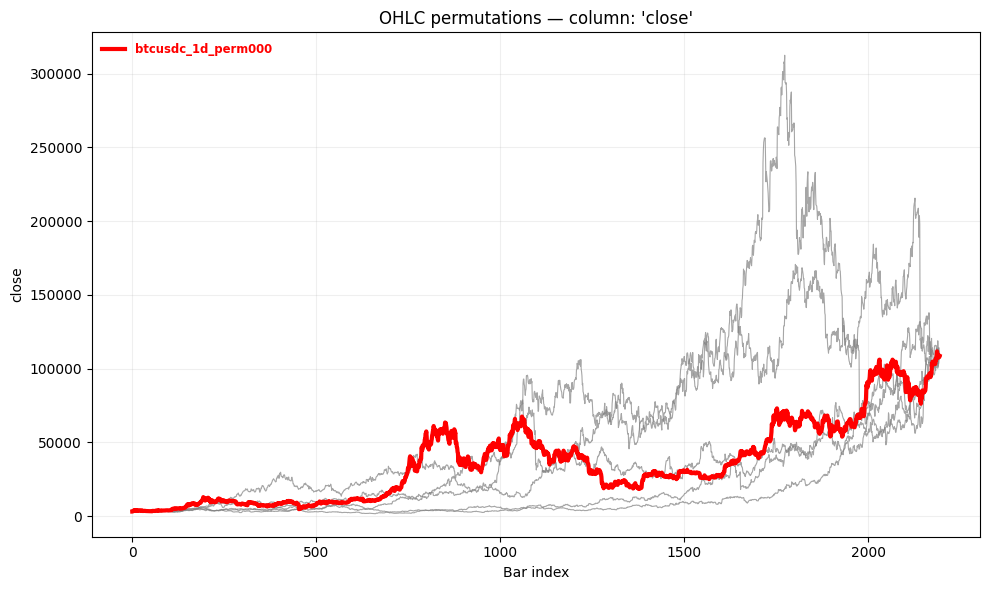


Statistical comparison (log-returns)
perm000 :  mean=1.609e-03  std=3.538e-02  skew=-1.232  kurt=21.732
ensemble: mean=1.609e-03  std=3.533e-02  skew=-1.268  kurt=21.913


In [14]:
#!/usr/bin/env python3
"""Analyze OHLC permutations in *PERM_DIR*.

Fonctions incluses
------------------
1. **`load_permutations`**   → charge tous les parquets `*_perm*.parquet` et
   renvoie une liste `(stem, ndarray_close)`.
2. **`stat_summary`**        → calcule *mean*, *std*, *skew*, *kurt* des log-
   rendements pour chaque série.
3. **`print_comparison`**    → compare `perm000` avec la moyenne des autres.
4. **`plot_permutations`**   → graphique (inchangé) : `_perm000` en rouge,
   permutations en gris.

L’axe X reste **numérique** (bar index) — aucune notion de date.
"""
from __future__ import annotations
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

# === CONFIGURATION =========================================================
PERM_DIR = Path("/Users/sloutmyv/Documents/Github/trading-overview/crypto_data/strategy/008/perm")
PATTERN  = "*_perm*.parquet"   # motif des fichiers
COL      = "close"             # colonne à analyser
REBASE   = False               # Pas de rebase pour l'analyse statistique
# ===========================================================================

###############################################################################
# DATA LOADING ################################################################
###############################################################################

def load_permutations(folder: Path, pattern: str = PATTERN):
    """Retourne une liste `(stem, ndarray_close)` triée par nom de fichier."""
    files = sorted(folder.glob(pattern))
    if not files:
        raise FileNotFoundError(f"No files matching {pattern} in {folder}")

    data: list[tuple[str, np.ndarray]] = []
    for fp in files:
        df = pd.read_parquet(fp)
        if COL not in df.columns:
            raise KeyError(f"Column '{COL}' missing in {fp.name}")
        arr = df[COL].to_numpy(copy=True)
        if REBASE:
            arr = arr / arr[0]
        data.append((fp.stem, arr))
    return data

###############################################################################
# STATISTICS ##################################################################
###############################################################################

def _log_returns(price: np.ndarray) -> np.ndarray:
    return np.diff(np.log(price))


def stat_summary(arr: np.ndarray) -> dict[str, float]:
    """mean, std, skew, kurt of log-returns."""
    r = _log_returns(arr)
    return {
        "mean": float(r.mean()),
        "std":  float(r.std(ddof=0)),
        "skew": float(skew(r, bias=False)),
        "kurt": float(kurtosis(r, bias=False)),
    }


def print_comparison(data):
    """Print stats for perm000 vs. the ensemble average of permutations."""
    stats_perm0 = None
    ensemble = []

    for name, arr in data:
        st = stat_summary(arr)
        if name.endswith("perm000"):
            stats_perm0 = st
        else:
            ensemble.append(st)

    if stats_perm0 is None:
        raise ValueError("perm000 file not found in data set.")

    # Aggregate ensemble (mean of stats across permutations)
    ensemble_df = pd.DataFrame(ensemble)
    stats_ens = ensemble_df.mean().to_dict()

    print("\nStatistical comparison (log-returns)")
    print("===================================")
    print(f"perm000 :  mean={stats_perm0['mean']:.3e}  std={stats_perm0['std']:.3e}  "
          f"skew={stats_perm0['skew']:.3f}  kurt={stats_perm0['kurt']:.3f}")
    print(f"ensemble: mean={stats_ens['mean']:.3e}  std={stats_ens['std']:.3e}  "
          f"skew={stats_ens['skew']:.3f}  kurt={stats_ens['kurt']:.3f}")

###############################################################################
# PLOTTING ####################################################################
###############################################################################

def plot_permutations(data):
    """Affiche chaque série sur une même figure Matplotlib."""
    plt.figure(figsize=(10, 6))
    for name, arr in data:
        x = np.arange(arr.size)
        if name.endswith("perm000"):
            plt.plot(x, arr, lw=3, color="red", zorder=5, label=name)
        else:
            plt.plot(x, arr, lw=0.8, color="gray", alpha=0.7)

    plt.title(f"OHLC permutations — column: '{COL}'")
    plt.xlabel("Bar index")
    plt.ylabel(COL)
    plt.grid(alpha=0.2)

    leg = plt.legend(loc="upper left", fontsize="small", frameon=False)
    for txt in leg.get_texts():
        if txt.get_text().endswith("perm000"):
            txt.set_weight("bold")
            txt.set_color("red")
        else:
            txt.set_color("gray")
    plt.tight_layout()
    plt.show()

###############################################################################
# MAIN ########################################################################
###############################################################################

if __name__ == "__main__":
    data = load_permutations(PERM_DIR)

    # 1) Affichage graphique optionnel
    plot_permutations(data)

    # 2) Résumé statistique
    print_comparison(data)
